In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from prettytable import PrettyTable

In [3]:
%pwd

'C:\\Users\\laksh\\Downloads\\CODES\\Course\\AI-3\\Project'

In [4]:
df_lpv = pd.read_csv(r'Mini Dataset/mini_vari_long_period_variable.csv')
df_cep = pd.read_csv(r'Mini Dataset/mini_vari_cepheid.csv')
df_ecl = pd.read_csv(r'Mini Dataset/mini_vari_eclipsing_binary.csv')
df_rr = pd.read_csv(r'Mini Dataset/mini_vari_rr_lyrae.csv')

In [5]:
pt = PrettyTable()
pt.field_names = ["Table Name","Shape"]
pt.add_row(['df_lpv',df_lpv.shape])
pt.add_row(['df_cep',df_cep.shape])
pt.add_row(['df_ecl',df_ecl.shape])
pt.add_row(['df_rr',df_rr.shape])
print(pt)

+------------+------------+
| Table Name |   Shape    |
+------------+------------+
|   df_lpv   | (45000, 7) |
|   df_cep   | (45063, 7) |
|   df_ecl   | (45000, 7) |
|   df_rr    | (45000, 7) |
+------------+------------+


In [6]:
df_lpv.head()

,Unnamed: 0,source_id,band,time,mag,flux,label
0,0,1739635791250949888,G,"[1762.171563756753, 1789.3346737387749, 1789.4...","[9.567025320639338, 9.639615785473968, 9.63656...","[2806316.298516713, 2624825.4763865843, 263221...",LPV
1,0,1739635791250949888,RP,"[1762.1719658673214, 1789.335073248464, 1789.4...","[8.413678079849849, 8.473714179550512, 8.47452...","[3417330.388311011, 3233497.493567463, 3231078...",LPV
2,0,1739635791250949888,BP,"[1762.1718765173184, 1789.334987162517, 1789.4...","[10.946956606031076, 11.028639184418028, 11.03...","[570997.5488165293, 529616.1410202786, 526644....",LPV
3,0,6563078678217838976,G,"[1715.6869586001349, 1715.760962508365, 1715.9...","[7.130986792513927, 7.141169088399881, 7.14134...","[26457696.470910635, 26210729.681910034, 26206...",LPV
4,0,6563078678217838976,RP,"[1715.6873614641634, 1715.7613653483847, 1715....","[5.870751844061847, 5.871277306456967, 5.86589...","[35551461.81185705, 35534260.17814388, 3571069...",LPV


In [7]:
def convert_to_list(string):
    return [float(i) if i != '' else 0 for i in string.split(', ')]

In [8]:
def process_dataset(df):
    columns = ['time', 'mag', 'flux']
    for i in columns:
        df[i] = df[i].apply(lambda x: x[1:-1])
        df = df[~df[i].isnull()]
        df[i] = df[i].apply(convert_to_list)
    return df

In [9]:
df_lpv = process_dataset(df_lpv)
df_cep = process_dataset(df_cep)
df_ecl = process_dataset(df_ecl)
df_rr = process_dataset(df_rr)

In [10]:
def plot_records(df,variable,name,band):
    if band == 'G':
        indexes = [0,3,6,9]
    if band == 'RP':
        indexes = [1,4,7,10]
    if band == 'BP':
        indexes = [2,5,8,11]
    fig, ax = plt.subplots(2,2,figsize = (20,10))
    ax[0][0].plot(df['time'][indexes[0]], df[variable][indexes[0]], color = band[0].lower())
    ax[0][0].set_title('Record 1')
    ax[0][1].plot(df['time'][indexes[1]], df[variable][indexes[1]], color = band[0].lower())
    ax[0][1].set_title('Record 2')
    ax[1][0].plot(df['time'][indexes[2]], df[variable][indexes[2]], color = band[0].lower())
    ax[1][0].set_title('Record 3')
    ax[1][1].plot(df['time'][indexes[3]], df[variable][indexes[3]], color = band[0].lower())
    ax[1][1].set_title('Record 4')
    plt.suptitle(f'Visualizing {variable} of class {name} of band {band}')
    for i in ax.flatten():
        i.set_xlabel('Time')
        i.set_ylabel(f'{variable}')
        i.grid(True)
    plt.show()

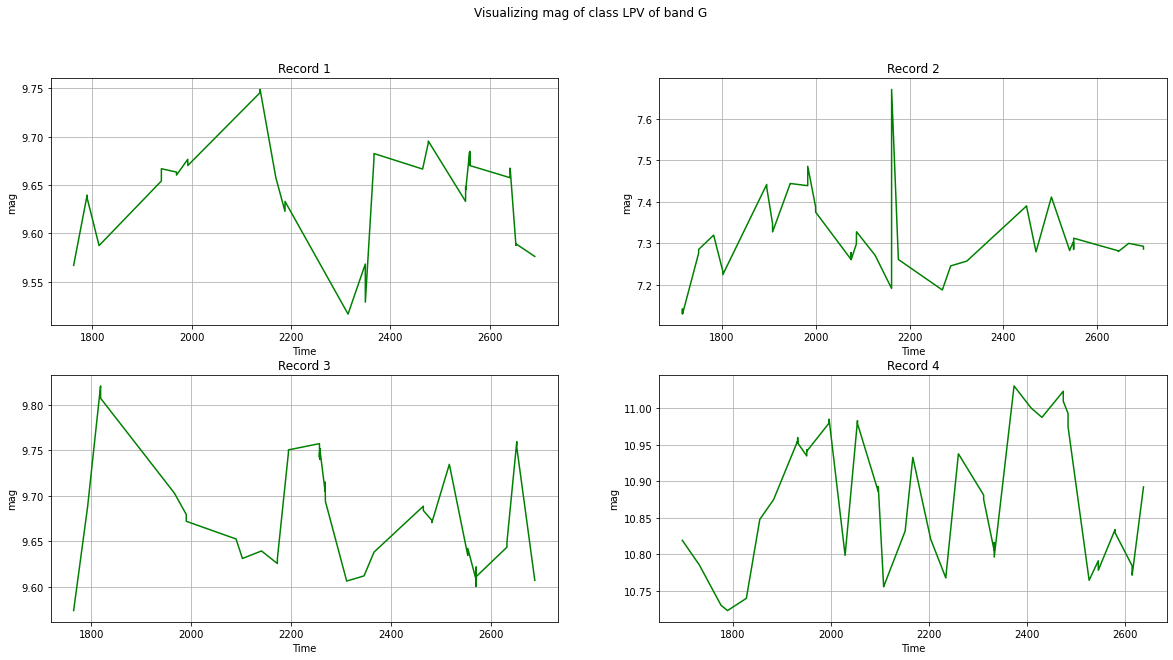

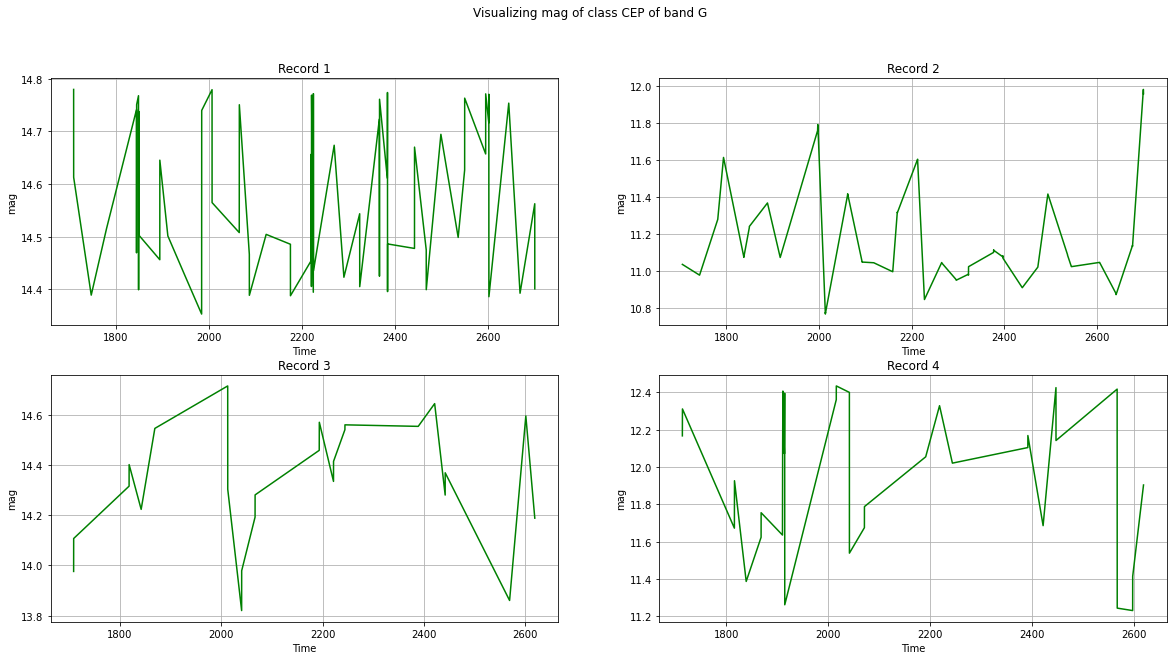

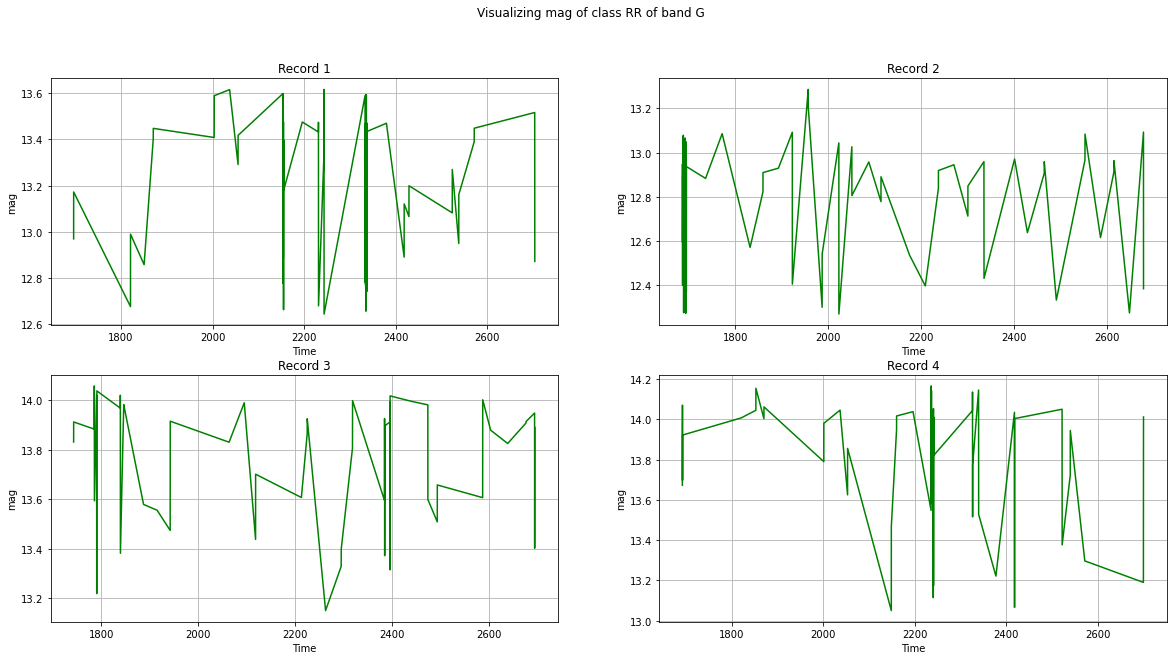

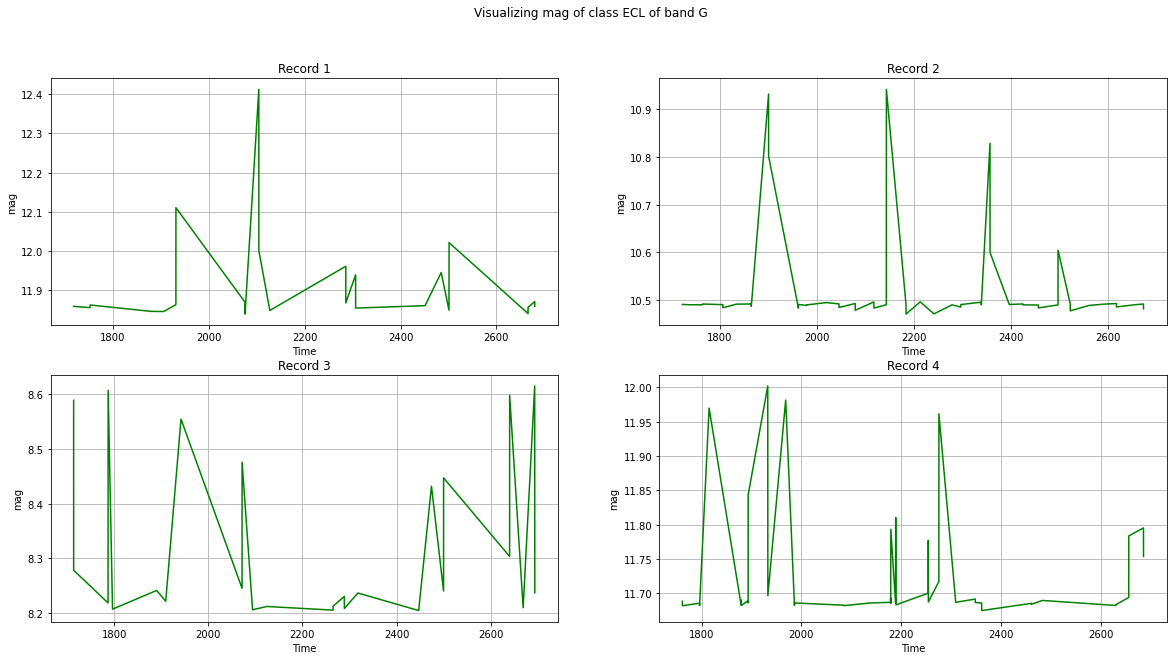

In [11]:
plot_records(df_lpv,'mag','LPV',"G")
plot_records(df_cep,'mag','CEP',"G")
plot_records(df_rr,'mag','RR',"G")
plot_records(df_ecl,'mag','ECL',"G")

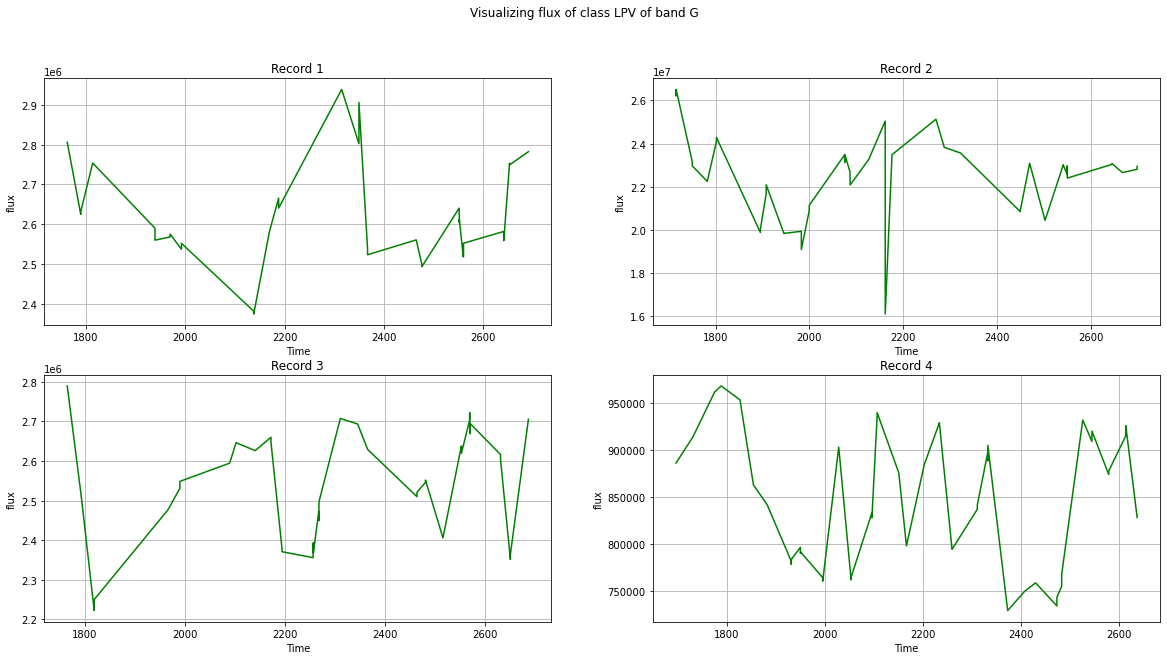

In [12]:
plot_records(df_lpv,'flux','LPV',"G")

In [13]:
def get_statistics(df, band, variable):
    temp =df[df['band'] == band] 
    arr_temp = np.hstack(temp[variable])
    temp_df = pd.DataFrame(arr_temp, columns = [variable])
    return temp_df.describe(

In [39]:
def print_statistics(df,variable,name,band):
    temp = get_statistics(df,band,variable)
    pt = PrettyTable()
    pt.field_names = ['Statistic','Value']
    print(f'Statistics of {variable} for class {name}.')
    for i in range(len(temp)):
        pt.add_row([temp.index[i],round(temp[variable][temp.index[i]],4)])
    print(pt)

In [40]:
print_statistics(df_lpv,'mag','LPV',"G")

Statistics of mag for class LPV.
+-----------+----------+
| Statistic |  Value   |
+-----------+----------+
|   count   | 760163.0 |
|    mean   | 11.3699  |
|    std    |  1.6886  |
|    min    |  4.8494  |
|    25%    | 10.2546  |
|    50%    | 11.5116  |
|    75%    | 12.5192  |
|    max    | 19.7064  |
+-----------+----------+
